<a href="https://colab.research.google.com/github/TheCasper05/ProyectoArbolPeliculas/blob/main/Lab1_ED2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importaciones

In [10]:
from typing import Any, Optional, Tuple
import pandas as pd
import matplotlib.pyplot as plt   #Librerías utilizadas.
import networkx as nx
from collections import deque




dataset_movies = pd.read_csv('dataset_movies.csv') #Importación Del Dataset.

Clase Nodo

In [11]:
class Nodo: #Clase De los Nodos
    def __init__(self, Pelicula, left, right, padre):
        self.Pelicula = Pelicula # Recibe como parametro de dato un objeto de tipo Pelicula.
        self.left = None
        self.right = None
        self.padre = None

Clase pelicula

In [12]:
class Pelicula: #Clase película, con Atributos según los requerimientos.
    def __init__(self, Titulo, Ganancias_mundiales, Ganancias_nacionales, Porcentaje_de_ingresos_nacionales, Ganancias_en_el_extranjero, Porcentaje_de_ganancias_en_extranjero, Anio):
      self.Titulo = Titulo
      self.Ganancias_mundiales = Ganancias_mundiales
      self.Ganancias_nacionales = Ganancias_nacionales
      self.Porcentaje_de_ingresos_nacionales = Porcentaje_de_ingresos_nacionales
      self.Ganancias_en_el_extranjero = Ganancias_en_el_extranjero
      self.Porcentaje_de_ganancias_en_extranjero = Porcentaje_de_ganancias_en_extranjero
      self.Anio = Anio

Clase Árbol Binario

In [13]:
from re import I
class BinaryTree: # Clase ÁrbolBinario
    def __init__(self, root=None):
        self.root = root

    def search(self, Titulo): #Función para buscar un Nodo
        nodo, pad = self.root, None
        while nodo is not None:
            if nodo.Pelicula.Titulo == Titulo:
                return nodo, pad
            else:
                pad = nodo
                if Titulo < nodo.Pelicula.Titulo:
                    nodo = nodo.left
                else:
                    nodo = nodo.right
        return nodo, pad

    def buscar_titulo(self, titulo): #Función que Verifica que el título de la película exista en el Dataset
        resultado = dataset_movies[dataset_movies['Title'].str.contains(titulo, case=False, na=False)]
        if resultado.empty:
            return False
        else:
            return True

    def buscar_Pelicula(self, Titulo): #Función que retorna en un vector, todos aquellos datos de la película solicitada.
        df = dataset_movies
        titulo_a_buscar = Titulo
        fila_filtrada = df[df['Title'] == titulo_a_buscar]
        if not fila_filtrada.empty:
            primera_fila = fila_filtrada.iloc[0]
            vector_valores = primera_fila.values.tolist()
            return vector_valores
        else:
            return None

    def insert(self, Titulo) -> bool: #Método para insertar Nodos al árbol
        if self.buscar_titulo(Titulo):
            nodo, pad = self.search(Titulo)
            if nodo is None:
                datos_Pelicula = self.buscar_Pelicula(Titulo)
                if datos_Pelicula is None:
                    return False
                pelicula = Pelicula(datos_Pelicula[0], datos_Pelicula[1], datos_Pelicula[2], datos_Pelicula[3],
                                    datos_Pelicula[4], datos_Pelicula[5], datos_Pelicula[6]) #Crear el objeto de Tipo Película y asignarle los datos correspondientes a sus atributos.
                nodo = Nodo(pelicula, None, None, None) #Crear el Nodo
                if self.root is None:
                    self.root = nodo
                else:
                    if nodo.Pelicula.Titulo < pad.Pelicula.Titulo:
                        nodo.padre = pad
                        pad.left = nodo
                    else:
                        nodo.padre = pad
                        pad.right = nodo
                self.balancear(nodo) #Balancear en Dado caso que se requiera
                self.graficar_arbol() #Gráficar luego de insertar.
                return True
            else:
                return False
        else:
            return False
    def delete(self, data: Any, mode: bool = True) -> bool: #Eliminar Un nodo
        p, pad = self.search(data)
        if pad is None:
          self.root=None
          return True
        if p is not None:

            if p.left is None and p.right is None: #hoja
                if p == pad.left:
                    pad.left = None
                else:
                    pad.right = None
                self.balancear_tras_eliminacion(p.padre)
                p = None
                self.graficar_arbol()

                return True
            elif p.left is None and p.right is not None: #hijo derecho
                if p == pad.left:
                    pad.left = p.right
                else:
                    pad.right = p.right

                self.balancear_tras_eliminacion(p.padre)
                p = None
                self.graficar_arbol()

                return True


            elif p.left is not None and p.right is None: #Hijo izquierdo
                if p == pad.left:
                    pad.left = p.left
                else:
                    pad.right = p.left
                self.balancear_tras_eliminacion(p.padre)
                p = None
                self.graficar_arbol()

                return True
            else: # dos hijos
                if mode:
                    pred, pad_pred, son_pred = self.__pred(p)
                    p.Pelicula.Titulo = pred.Pelicula.Titulo
                    if p == pad_pred: # si es raiz
                        pad_pred.left = son_pred
                    else: # otro caso
                        pad_pred.right = son_pred
                        p = pred
            self.balancear_tras_eliminacion(p.padre) #Balancear si es necesario.

            del pred, p
            self.graficar_arbol()#Graficar luego de eliminar.

            return True

        return False

    def __pred(self, node: "Nodo") -> Tuple["Nodo", "Nodo", Optional["Nodo"]]: #Predecesor: Busca el nodo mayor de los menores, y lo reemplaza por el nodo a eliminar.
        p, pad = node.left, node
        while p.right is not None:
            p, pad = p.right, p
        return p, pad, p.left

    def balancear_tras_eliminacion(self, nodo): #Método que balancea cuando se eliminan nodos.
      while nodo is not None:
        factor_balanceo = self.factor_balanceo(nodo)
        if factor_balanceo > 1:
            if self.factor_balanceo(nodo.right) < 0:
                self.rotacion_simple_derecha(nodo.right)
            self.rotacion_simple_izquierda(nodo)
        elif factor_balanceo < -1:
            if self.factor_balanceo(nodo.left) > 0:
                self.rotacion_simple_izquierda(nodo.left)
            self.rotacion_simple_derecha(nodo)
        nodo = nodo.padre

    def altura(self, nodo): #Metodo que calcula la altura de un árbol
     if nodo is None:
        return -1
     else:
        altura_izquierda = self.altura(nodo.left)
        altura_derecha = self.altura(nodo.right)
        return 1 + max(altura_izquierda, altura_derecha)

    def factor_balanceo(self, nodo): #Método que calcula el factor de Balanceo de un árbol
     if nodo is None:
        return 0
     else:
        balanceo = self.altura(nodo.right) - self.altura(nodo.left)
        return balanceo

    def balancear(self,nodo): #Método que balancea un árbol.
        while (nodo.padre is not None):
                      factor_balanceo_padre = self.factor_balanceo(nodo.padre)
                      factor_balanceo_hijo = self.factor_balanceo(nodo)
                      if(factor_balanceo_padre==-2 or factor_balanceo_padre==2):
                         if(factor_balanceo_hijo==1 and factor_balanceo_padre==2):#rot simple izq
                            self.rotacion_simple_izquierda(nodo.padre)
                            return True

                         if(factor_balanceo_hijo==-1 and factor_balanceo_padre==-2):#rot simple der
                            self.rotacion_simple_derecha(nodo.padre)
                            return True

                         if(factor_balanceo_hijo==-1 and factor_balanceo_padre==2):#rot doble derecha - izq
                            self.rotacion_doble_derecha_izquierda(nodo.padre)
                            return True
                         if(factor_balanceo_hijo==1 and factor_balanceo_padre==-2):#rot doble izq - der
                            self.rotacion_doble_izquierda_derecha(nodo.padre)
                            return True

                      nodo=nodo.padre


    def rotacion_simple_izquierda(self, nodo):
     aux = nodo.right
     nodo.right = aux.left
     if aux.left is not None:
        aux.left.padre = nodo
     aux.padre = nodo.padre
     if nodo.padre is None:
        self.root = aux
     elif nodo == nodo.padre.left:
        nodo.padre.left = aux
     else:
        nodo.padre.right = aux
     aux.left = nodo
     nodo.padre = aux

    def rotacion_simple_derecha(self, nodo):
     aux = nodo.left
     nodo.left = aux.right
     if aux.right is not None:
        aux.right.padre = nodo
     aux.padre = nodo.padre
     if nodo.padre is None:
        self.root = aux
     elif nodo == nodo.padre.right:
        nodo.padre.right = aux
     else:
        nodo.padre.left = aux
     aux.right = nodo
     nodo.padre = aux

    def rotacion_doble_izquierda_derecha(self, nodo):
     self.rotacion_simple_izquierda(nodo.left)
     self.rotacion_simple_derecha(nodo)

    def rotacion_doble_derecha_izquierda(self, nodo):
     self.rotacion_simple_derecha(nodo.right)
     self.rotacion_simple_izquierda(nodo)



    def informacion (self, titulo): #Método que regresa la información de acuerdo a el título de una película, basandose en la información del dataset
         peli = self.buscar_nodo(titulo)
         if(peli):
          print("Titulo: ",peli.Pelicula.Titulo)
          print("Ganancias en el extranjero: ",peli.Pelicula.Ganancias_en_el_extranjero)
          print("Porcentaje de ingresos nacionales: ",peli.Pelicula.Porcentaje_de_ingresos_nacionales)
          print("Ganancias en el extranjero: ",peli.Pelicula.Ganancias_en_el_extranjero)
          print("Porcentaje de ganancias en el extranjero: ",peli.Pelicula.Porcentaje_de_ganancias_en_extranjero)
          print("Año: ",peli.Pelicula.Anio)
          return True

         else:
          print(f"Nodo con título '{titulo}' no encontrado.")
          return False


    def nodo_padre (self, nodo): #Método que nos da el padre de un Nodo, si es que existe.
       if nodo is None:
          return None
       else:
          p, pad = self.search(nodo.Pelicula.Titulo)
          if(pad==None):
             return "No tiene padre"
          return pad.Pelicula.Titulo


    def info_Extra (self, titulo, boolean): #Método que nos da información extra de un en base a cómo está distribuido en el árbol
      peli = self.buscar_nodo(titulo)
      if(boolean==True):
         respuesta = input("Si quiere ver la informacion extra de la pelicula escriba 'Si': ")
         if(respuesta.lower() == "si"):
            print("nivel del nodo: ", self.find_node_level(self.root,peli))
            print("Factor de balanceo: ", self.factor_balanceo(peli))
            print("Padre: ", self.nodo_padre(peli))
            print("Abuelo: ", self.nodo_abuelo(peli))
            print("Tio: ", self.nodo_tio(peli))
         else:
          return None


    def nodo_abuelo (self, nodo): #Método que nos da el abuelo de un Nodo, si es que existe.
       if nodo is None:
          return None
       else:
          p, pad = self.search(nodo.Pelicula.Titulo)
          if pad is None:
            return "No tiene padre, ni abuelo"
          pad,abuelo = self.search(pad.Pelicula.Titulo)
          if (abuelo==None):
            return "No tiene abuelo"
          return abuelo.Pelicula.Titulo

    def nodo_tio (self, nodo): #Método que nos da el tio de un nodo, si es que existe.
       if nodo is None:
          return None
       else:
          p, pad = self.search(nodo.Pelicula.Titulo)
          if pad is None:
            return "No tiene padre, ni tio"
          pad,abuelo = self.search(pad.Pelicula.Titulo)
          if (abuelo==None):
            return "No tiene abuelo, ni tio"
          if pad.Pelicula.Titulo is abuelo.left.Pelicula.Titulo:
            if(abuelo.right == None):
              return "No tiene tio"
            return abuelo.right.Pelicula.Titulo
          if pad.Pelicula.Titulo is abuelo.right.Pelicula.Titulo:
            if(abuelo.left == None):
              return "No tiene tio"
            return abuelo.left.Pelicula.Titulo


    def find_node_level(self, root, node, level=0): #Método que nos da el nivel de un nodo
    # Caso base: si el árbol está vacío
     if root is None:
        return -1  # Retorna -1 si el nodo no se encuentra en el árbol

    # Si el nodo es encontrado, retorna el nivel actual
     if root == node:
        return level

    # Busca el nodo en el subárbol izquierdo
     downlevel = self.find_node_level(root.left, node, level + 1)
     if downlevel != -1:
        return downlevel

    # Si el nodo no se encuentra en el subárbol izquierdo, busca en el derecho
     return self.find_node_level(root.right, node, level + 1)


    def agregar_nodos_aristas(self, G, nodo, pos=None, nivel=0, x=0, min_y=20, nivel_diff=1.5): #Método que Forma el arbol para ser gráficado
        if nodo is not None:
            pos[nodo] = (x, -nivel * min_y)
            if nodo.left is not None:
                G.add_edge(nodo, nodo.left)
                self.agregar_nodos_aristas(G, nodo.left, pos, nivel + 1, x - nivel_diff, min_y, nivel_diff / 2)
            if nodo.right is not None:
                G.add_edge(nodo, nodo.right)
                self.agregar_nodos_aristas(G, nodo.right, pos, nivel + 1, x + nivel_diff, min_y, nivel_diff / 2)

    def graficar_arbol(self): #Método que grafica el arbol
        G = nx.DiGraph()
        pos = {}

        # Asegurarse de que se dibuja incluso si hay solo un nodo
        if self.root is not None:
            self.agregar_nodos_aristas(G, self.root, pos)
            G.add_node(self.root)  # Asegurarse de agregar el nodo raíz aunque no tenga hijos
            pos[self.root] = (0, 0)  # Ubicación del nodo raíz

            fig, ax = plt.subplots(figsize=(12, 8))
            nx.draw(G, pos, with_labels=False, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", font_color="black", ax=ax)
            etiquetas = {nodo: nodo.Pelicula.Titulo for nodo in G.nodes()}
            nx.draw_networkx_labels(G, pos, labels=etiquetas, font_size=8, font_color="darkred", ax=ax)
            plt.title("Árbol Binario de Búsqueda")
            plt.show()

    def buscar_nodo(self, titulo):
        return self._buscar_nodo_recursivo(self.root, titulo)

    def _buscar_nodo_recursivo(self, nodo, titulo):
        if nodo is None:
            return None

        # Verificar si el nodo actual tiene el título que buscamos
        if nodo.Pelicula.Titulo == titulo:
            return nodo

        # Recorrer el subárbol izquierdo
        encontrado = self._buscar_nodo_recursivo(nodo.left, titulo)
        if encontrado is not None:
            return encontrado

        # Recorrer el subárbol derecho
        return self._buscar_nodo_recursivo(nodo.right, titulo)

    def buscar_peliculas(self, anio, valor):
        return self.buscar_peliculas_recursivo(self.root, anio, valor)

    def buscar_peliculas_recursivo(self, nodo, anio, valor):
        if nodo is None:
            return []

        peliculas = []

        # Verificar si el nodo actual cumple con los criterios
        if (nodo.Pelicula.Anio == anio and
            nodo.Pelicula.Porcentaje_de_ingresos_nacionales < nodo.Pelicula.Porcentaje_de_ganancias_en_extranjero and
            nodo.Pelicula.Ganancias_en_el_extranjero >= valor):
            peliculas.append(nodo.Pelicula)

        # Buscar recursivamente en los subárboles izquierdo y derecho
        peliculas.extend(self.buscar_peliculas_recursivo(nodo.left, anio, valor))
        peliculas.extend(self.buscar_peliculas_recursivo(nodo.right, anio, valor))

        return peliculas

    def altura(self, nodo):
        if nodo is None:
            return 0
        else:
            left_height = self.altura(nodo.left)
            right_height = self.altura(nodo.right)
            return max(left_height, right_height) + 1

    def imprimir_nivel(self, nodo, nivel):
        if nodo is None:
            return
        if nivel == 1:
            print(nodo.Pelicula.Titulo, end="--")
        elif nivel > 1:
            self.imprimir_nivel(nodo.left, nivel - 1)
            self.imprimir_nivel(nodo.right, nivel - 1)

    def recorrido_por_niveles(self):
        h = self.altura(self.root)
        for i in range(1, h + 1):
            self.imprimir_nivel(self.root, i)
            print()  # Para imprimir cada nivel en una nueva línea



Main


Menú de Opciones:
1. Insertar un nodo
2. Eliminar un nodo
3. Buscar un nodo por título
4. Buscar películas por criterios
5. Mostrar recorrido por niveles del árbol
6. Salir


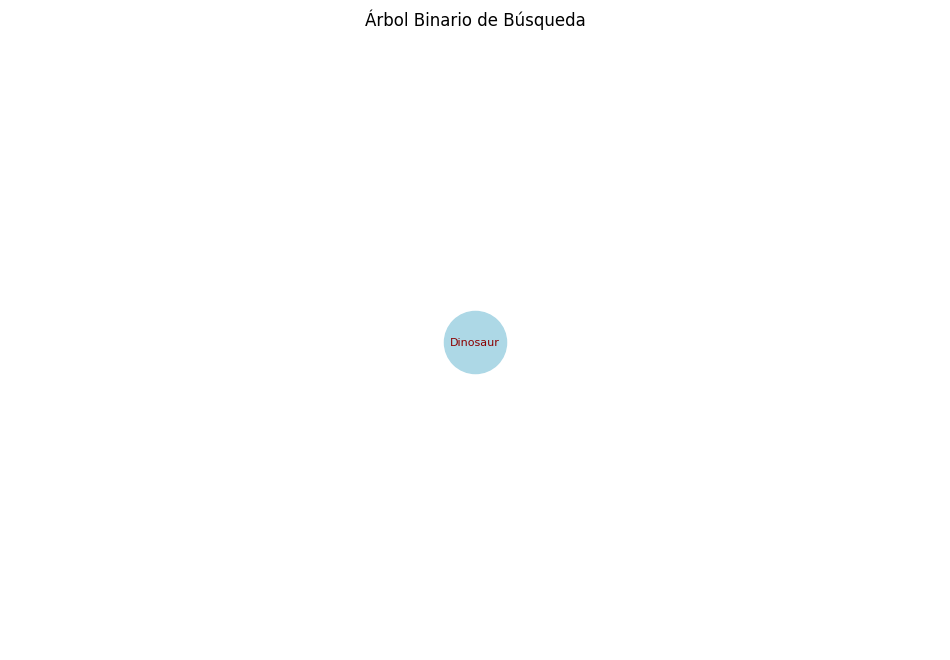

Película 'Dinosaur' insertada con éxito.

Menú de Opciones:
1. Insertar un nodo
2. Eliminar un nodo
3. Buscar un nodo por título
4. Buscar películas por criterios
5. Mostrar recorrido por niveles del árbol
6. Salir
Titulo:  Dinosaur
Ganancias en el extranjero:  212074702
Porcentaje de ingresos nacionales:  39.4
Ganancias en el extranjero:  212074702
Porcentaje de ganancias en el extranjero:  60.6
Año:  2000
nivel del nodo:  0
Factor de balanceo:  0
Padre:  No tiene padre
Abuelo:  No tiene padre, ni abuelo
Tio:  No tiene padre, ni tio

Menú de Opciones:
1. Insertar un nodo
2. Eliminar un nodo
3. Buscar un nodo por título
4. Buscar películas por criterios
5. Mostrar recorrido por niveles del árbol
6. Salir


In [ ]:
def mostrar_menu(): #Método que guarda un menú
    print("\nMenú de Opciones:")
    print("1. Insertar un nodo")
    print("2. Eliminar un nodo")
    print("3. Buscar un nodo por título")
    print("4. Buscar películas por criterios")
    print("5. Mostrar recorrido por niveles del árbol")
    print("6. Salir")


def main(): #Función Principal
      arbol = BinaryTree() #Objeto de tipo ArbolBinario.

      while True: #Menú iterativo.
        mostrar_menu()
        opcion = input("Elige una opción (1-6): ")

        if opcion == '1':
            titulo = input("Ingrese el título de la película a insertar: ")
            if arbol.insert(titulo):
                print(f"Película '{titulo}' insertada con éxito.")
            else:
                print(f"Error al insertar la película '{titulo}'. Puede que ya exista.")

        elif opcion == '2':
            titulo = input("Ingrese el título de la película a eliminar: ")
            if arbol.delete(titulo):
                print(f"Película '{titulo}' eliminada con éxito.")
            else:
                print(f"Error al eliminar la película '{titulo}'. Puede que no exista.")

        elif opcion == '3':
            titulo = input("Ingrese el título de la película a buscar: ")

            boolean = arbol.informacion(titulo)
            arbol.info_Extra(titulo,boolean)

        elif opcion == '4':
            anio = int(input("Ingrese el año de estreno: "))
            valor = float(input("Ingrese el valor especifico con el que desea comparar: "))
            peliculas = arbol.buscar_peliculas(anio, valor)
            if peliculas:
                print(f"Películas encontradas que cumplen con los criterios:")
                for pelicula in peliculas:
                    print(f"- {pelicula.Titulo}")
                a = True
                while(a == True):
                  Pelicula = input("Escriba el nombre de la pelicula que desea elegir: ")
                  for pelicula in peliculas:
                   if(pelicula.Titulo==Pelicula):
                     boolean=arbol.informacion(Pelicula)
                     arbol.info_Extra(Pelicula,boolean)
                     a=False
                     break
                  if (a==True):
                    print("No se encontro la pelicula")
            else:
                print("No se encontraron películas que cumplan con los criterios.")

        elif opcion == '5':
            print("Recorrido por niveles del árbol:")
            arbol.recorrido_por_niveles()

        elif opcion == '6':
            print("Saliendo del programa.")
            break

        else:
            print("Opción inválida, por favor elige una opción del menú.")

main() #Ejecutar el Programa.
